# Human Resource Analysis


Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business.

In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.


# ***Column Description***

- satisfacion_level: Showing satisfaction of a particular employee
-last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PCS\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PCS\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\PCS\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz


In [3]:
df= pd.read_csv('HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [6]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df['salary'].replace({'low':1,'medium':5,'high':10},inplace=True)

In [9]:
satisfaction_level=df['satisfaction_level']
last_evaluation=df['last_evaluation']
number_project=df['number_project']
average_montly_hours=df['average_montly_hours']
time_spend_company=df['time_spend_company']
Work_accident=df['Work_accident']

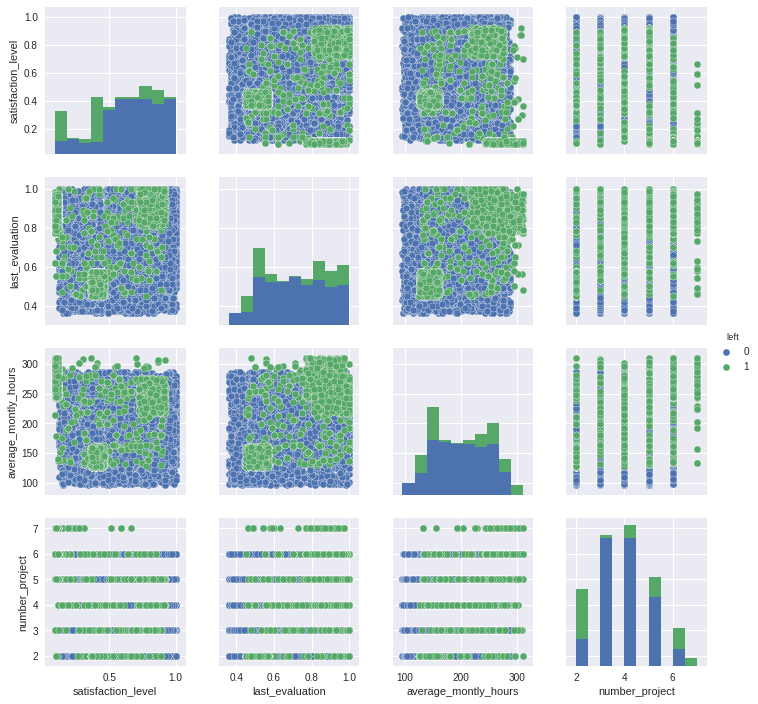

In [10]:
sns.pairplot(df, hue="left", vars=['satisfaction_level', 'last_evaluation', 'average_montly_hours','number_project'])
plt.show()

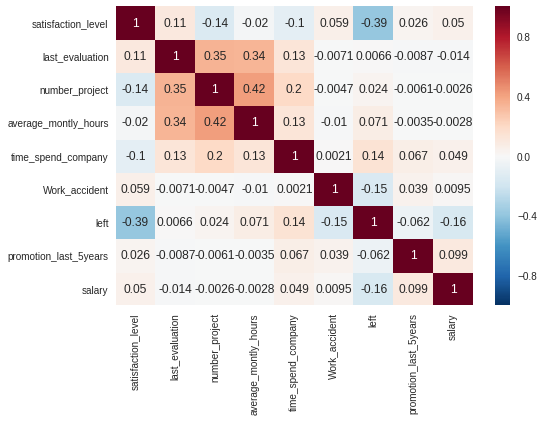

In [11]:
corr=df.corr()
sns.heatmap(corr,annot=True)

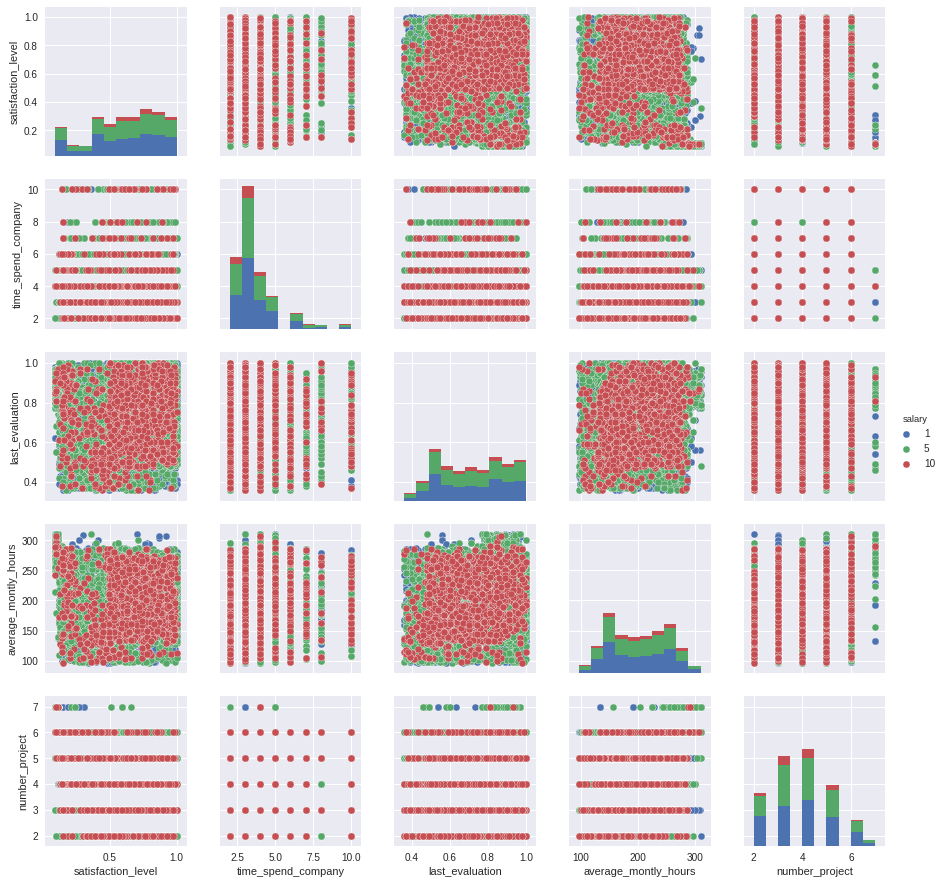

In [12]:
sns.pairplot(df, hue="salary", vars=['satisfaction_level','time_spend_company', 'last_evaluation', 'average_montly_hours','number_project'])
plt.show()

In [13]:
dummies=pd.get_dummies(df['sales'],prefix='sales')
df=pd.concat([df,dummies],axis=1)
df.drop(['sales'],axis=1,inplace=True)
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,5,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,5,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [14]:
X=df.drop(['left'],axis=1)
y=df['left']

In [15]:
#RandomForestClassifier
model=RandomForestRegressor(n_estimators=100,n_jobs=-1,oob_score=True,random_state=19)

model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=19,
           verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import roc_auc_score
y_pred=model.oob_prediction_
acc=roc_auc_score(y,y_pred)
print('Accuracy :',acc)

Accuracy : 0.991462540433


In [17]:
acc=[]
for i in [50,100,150,200,250,300,350,400,500,600]
    clf=RandomForestRegressor(n_estimators=i,n_jobs=-1,oob_score=True,random_state=19)
    clf.fit(X,y)
    y_pred=clf.oob_prediction_
    k=roc_auc_score(y,y_pred)
    acc.append(k)
   
print(acc)    

[0.99112293720258671, 0.99146254043309845, 0.99177373108364186, 0.99214341317737964, 0.99211786758478215, 0.99232524633792596, 0.99240608558011212, 0.99270432577915646, 0.99269741560446845, 0.99281477830542331]


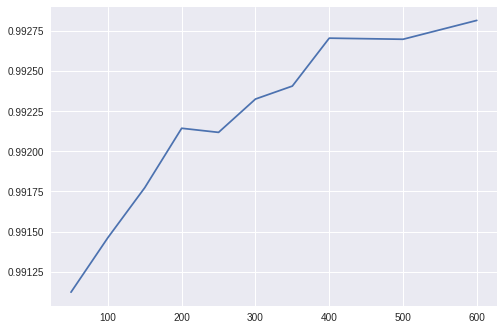

In [18]:
import matplotlib.pyplot as plt
xx=[50,100,150,200,250,300,350,400,500,600]
yy=acc
plt.plot(xx,yy)

In [19]:
model.n_outputs_

1

In [20]:
model.n_features_

18

In [21]:
X=df.drop(['left'],axis=1)
y=df['left']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
print(X_train.shape,y_train.shape,)
print(X_test.shape,y_test.shape)

(11999, 18) (11999,)
(3000, 18) (3000,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
#DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=int(0.05*len(X_train)),random_state=19)
boosted_dt=AdaBoostClassifier(dt,algorithm='SAMME',n_estimators=800,learning_rate=0.5)
boosted_dt.fit(X_train,y_train)
y_predicted=boosted_dt.predict(X_test)

print ("Area under ROC curve: %f"%(roc_auc_score(y_test, y_predicted)))


Area under ROC curve: 0.955490
